In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

start: 85374 records in this dataset 

In [15]:
state_dict = {'Alabama':1,
              'Alaska':1,
              'American Samoa':1,
              'Arizona':1,
              'Arkansas':1,
              'California':1,
              'Colorado':1,
              'Connecticut':1,
              'Delaware':1,
              'Diamond Princess':1,
              'District of Columbia':1,
              'Florida':1,
              'Georgia':1,
              'Grand Princess':1,
              'Guam':1,
              'Hawaii':1,
              'Idaho':1,
              'Illinois':1,
              'Indiana':1,
              'Iowa':1,
              'Kansas':1,
              'Kentucky':1,
              'Louisiana':1,
              'Maine':1,
              'Maryland':1,
              'Massachusetts':1,
              'Michigan':1,
              'Minnesota':1,
              'Mississippi':1,
              'Missouri':1,
              'Montana':1,
              'Nebraska':1,
              'Nevada':1,
              'New Hampshire':1,
              'New Jersey':1,
              'New Mexico':1,
              'New York':1,
              'North Carolina':1,
              'North Dakota':1,
              'Northern Mariana Islands':1,
              'Ohio':1,
              'Oklahoma':1,
              'Oregon':1,
              'Pennsylvania':1,
              'Puerto Rico':1,
              'Rhode Island':1,
              'South Carolina':1,
              'South Dakota':1,
              'Tennessee':1,
              'Texas':1,
              'Utah':1,
              'Vermont':1,
              'Virgin Islands':1,
              'Virginia':1,
              'Washington':1,
              'West Virginia':1,
              'Wisconsin':1,
              'Wyoming':1,
              'Recovered':pd.DataFrame()}


In [16]:
path = './datasets/csse_covid_19_daily_reports_us'

first = True

for file in sorted(os.listdir(path)):
    
    file_path = os.path.join(path, file)
    #print(file_path)
    if os.path.isfile(file_path):
        if file != 'README.md':
            temp = pd.read_csv(file_path)
            date = file[0:10]
            date = pd.to_datetime(date, format="%m-%d-%Y")

            for i in range(len(temp)):
                state = temp.iloc[i,0]
                if state == 'Recovered':
                    print(file_path)

                if(first):
                    state_dict[state] = pd.DataFrame(temp.iloc[[i]])
                    state_dict[state]['datetime'] = date
                    #display(state_dict[state])
                else:
                    state_dict[state] = pd.concat([state_dict[state], pd.DataFrame(temp.iloc[[i]])], ignore_index=True)          
                    state_dict[state].iloc[-1,-1] = date
            first=False

./datasets/csse_covid_19_daily_reports_us/04-12-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-13-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-14-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-15-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-16-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-17-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-18-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-19-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-20-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-21-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-22-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-23-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-24-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-25-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-26-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-27-2020.csv
./datasets/csse_covid_19_daily_reports_us/04-28-2020.csv
./datasets/csse_covid_19_daily_

In [ ]:
state_dict['Alabama']['datetime'].value_counts().value_counts()

count
1    1062
Name: count, dtype: int64

In [ ]:
type(state_dict['Alabama'].loc[0, 'Recovered'])

numpy.float64

In [ ]:
state_dict['California']['Active'].isna().value_counts()

Active
True     1057
False       5
Name: count, dtype: int64

### Replace erronious value with average of neighbors

In [17]:
print(state_dict['Kentucky'].loc[155, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[244, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[254, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[255, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[256, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[266, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[55, 'Incident_Rate'])

38240.086058223154
9536.799134583036
9611.289814630569
58927.99226801066
9613.751946483102
9685.579047526531
22988.902724080297


In [18]:
before = state_dict['Kentucky'].loc[254, 'Incident_Rate']
after =  state_dict['Kentucky'].loc[256, 'Incident_Rate']
state_dict['Kentucky'].loc[255, 'Incident_Rate'] = (before+after)/2
state_dict['Kentucky'].loc[255, 'Incident_Rate'] = 58927.99226801066

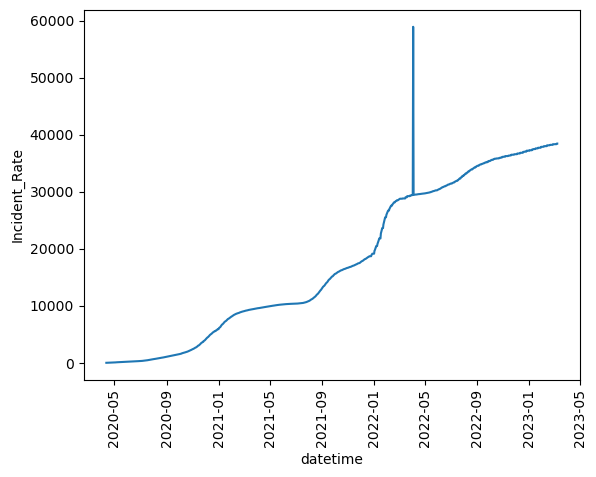

In [52]:
sns.lineplot(state_dict['Kentucky'], x='datetime', y='Incident_Rate')
plt.xticks(rotation=90)
plt.show()

In [20]:
print(state_dict['Kentucky'].loc[254, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[255, 'Incident_Rate'])
print(state_dict['Kentucky'].loc[256, 'Incident_Rate'])

9611.289814630569
58927.99226801066
9613.751946483102


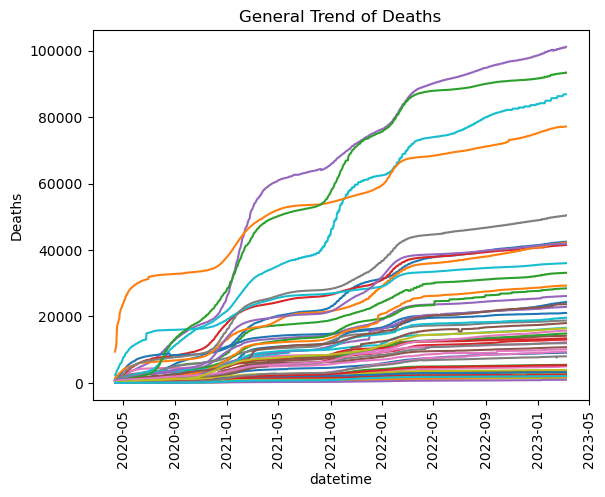

In [21]:
# df = state_dict['Alabama']
# df['current cases'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
# sns.scatterplot(df, x='datetime', y='Active')
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Florida']
states_r = ['Idaho', 'Montana', 'Wyoming', 'Utah', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma',
            'Texas', 'Iowa', 'Missouri', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Florida', 'Tennessee',
            'South Carolina', 'North Carolina', 'Kentucky', 'Indiana', 'Ohio', 'West Virginia']
states_d = ['Washington', 'Oregon', 'California', 'Nevada', 'Arizona', 'New Mexico', 'Colorado']

non_states = ['Recovered', 'American Samoa', 'Grand Princess', 'Diamond Princess', 'Guam', 'Puerto Rico', 'Northern Mariana Islands', 'Virgin Islands']

for state in state_dict:
    if state not in non_states and state != 'Kentucky':
        #state_dict[state].plot('datetime', ['Active', 'Deaths', 'Recovered'])
        sns.lineplot(state_dict[state], x='datetime', y='Deaths', estimator=None, errorbar='sd') # , label=state)

#plt.legend()
plt.title('General Trend of Deaths')
# plt.xlim(365*52, 365*52 + 460)
# plt.ylim(0.2, 2.2)
plt.xticks(rotation=90)
plt.show()

### Import Population Data

In [46]:
pop_data = pd.read_excel('../datasets/apportionment-2020-table02.xlsx', header=3).drop(columns='This cell is intentionally blank.')
pop_data.head()

,AREA,"RESIDENT POPULATION (APRIL 1, 2020)"
0,Alabama,5024279.0
1,Alaska,733391.0
2,Arizona,7151502.0
3,Arkansas,3011524.0
4,California,39538223.0


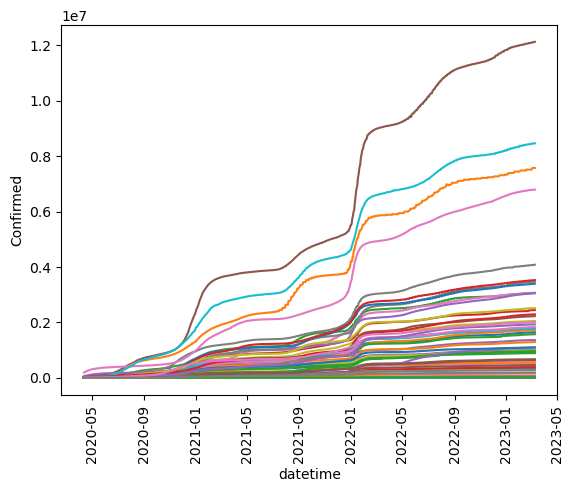

In [50]:
for state in state_dict:
    if state != 'Recovered':
        sns.lineplot(state_dict[state], x='datetime', y='Confirmed'/)

plt.xticks(rotation=90)
plt.show()

In [417]:
df = state_dict['Recovered']
df

,0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-30 02:32:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,NaN,Recovered,US,2020-04-26 02:32:45,NaN,NaN,0.0,0.0,100372.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-25,NaN,2020-04-25 00:00:00
180,NaN,Recovered,US,2020-04-27 02:32:46,NaN,NaN,0.0,0.0,106988.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-26,NaN,2020-04-26 00:00:00
181,NaN,Recovered,US,2020-04-28 02:32:46,NaN,NaN,0.0,0.0,111424.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-27,NaN,2020-04-27 00:00:00
182,NaN,Recovered,US,2020-04-29 02:32:33,NaN,NaN,0.0,0.0,115936.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-28,NaN,2020-04-28 00:00:00


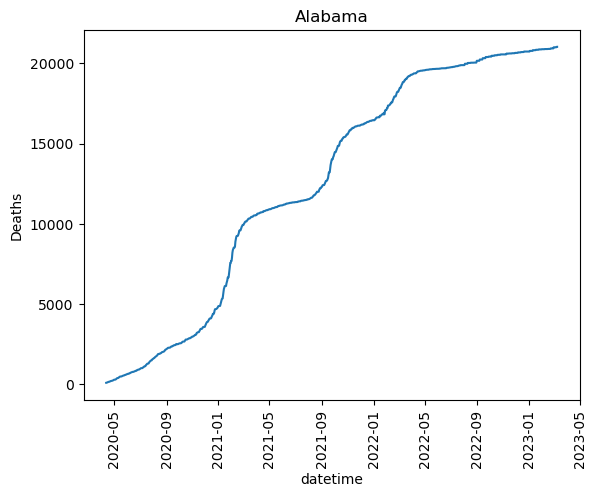

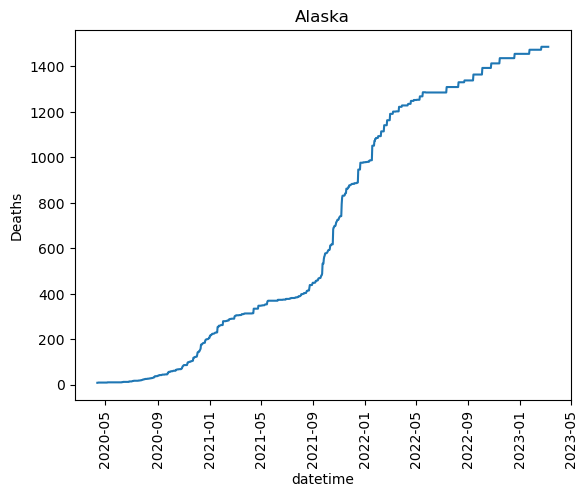

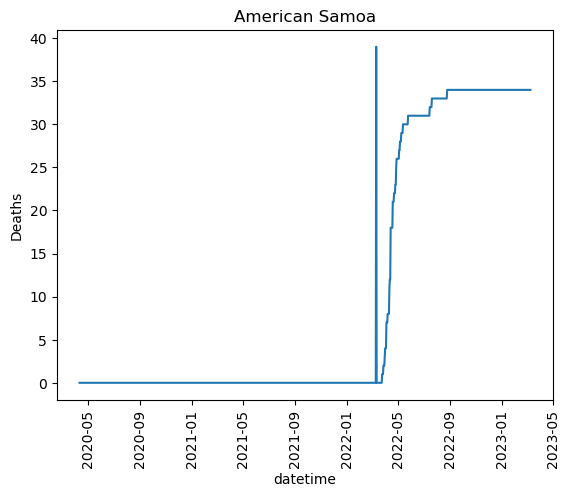

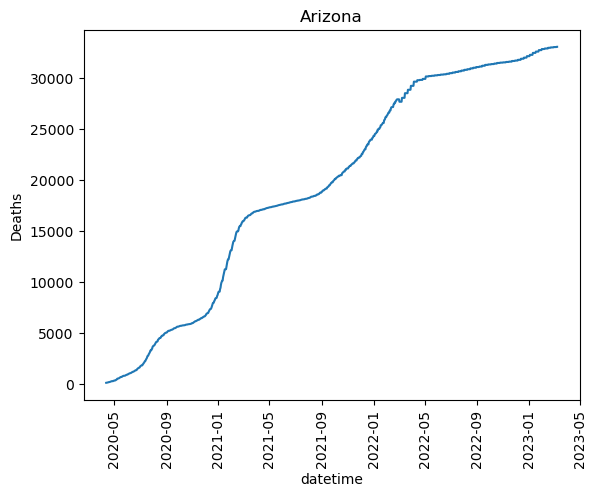

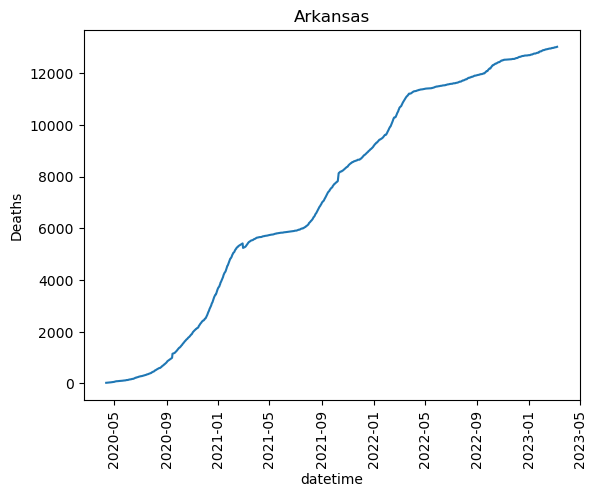

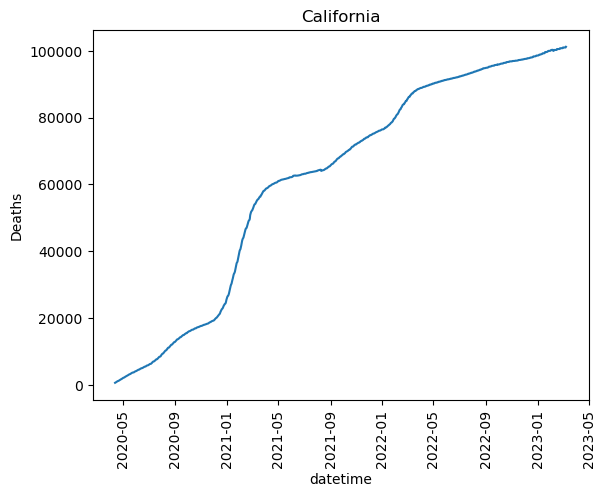

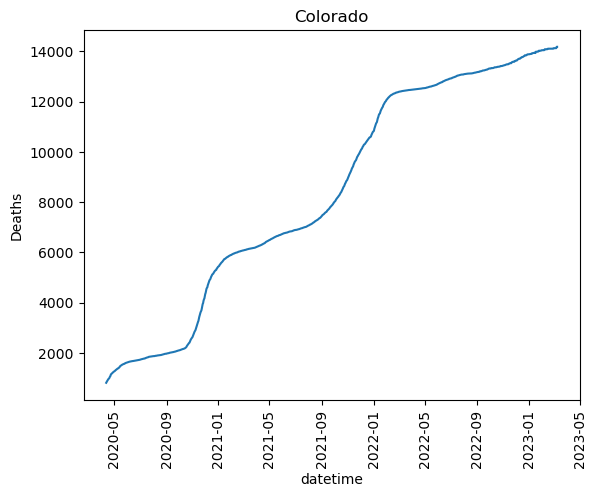

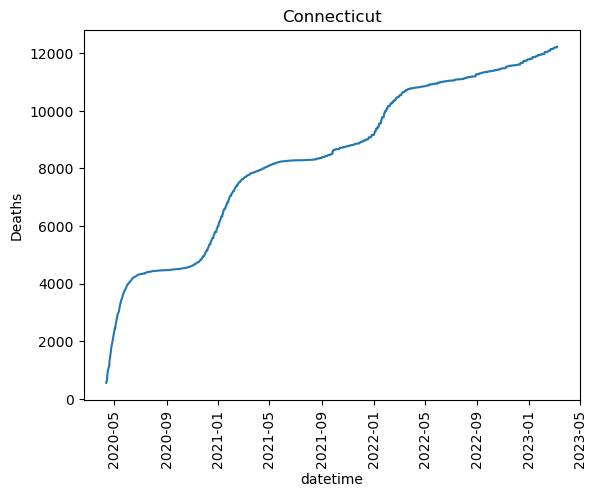

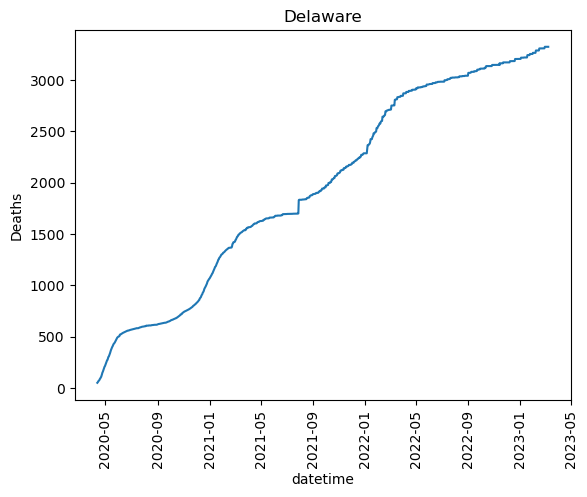

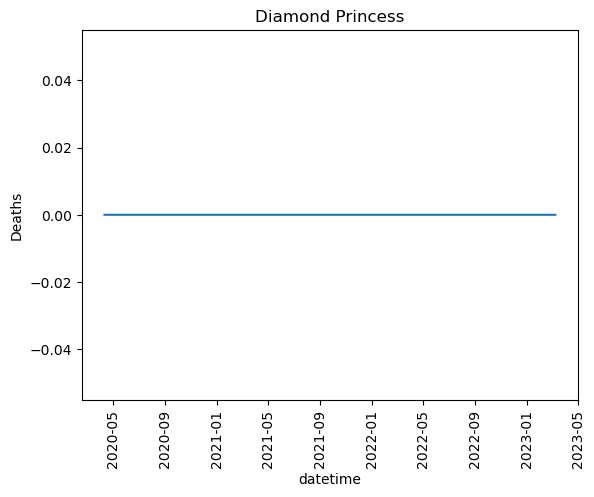

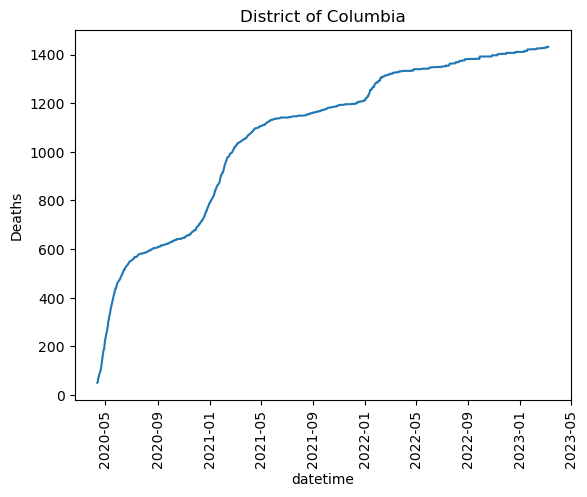

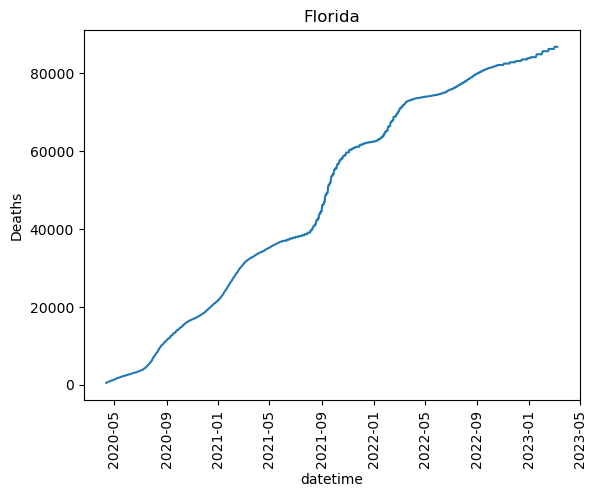

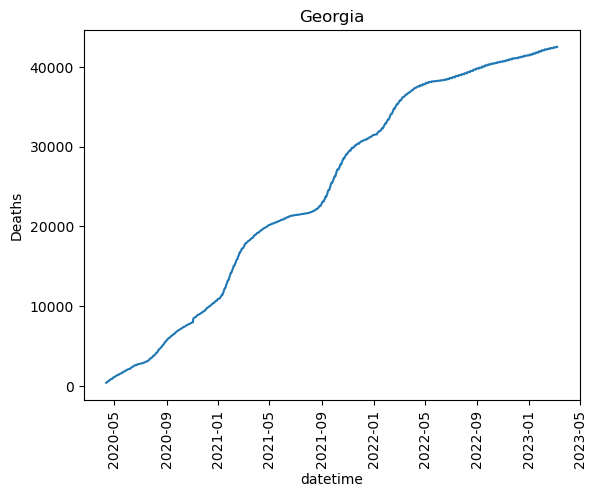

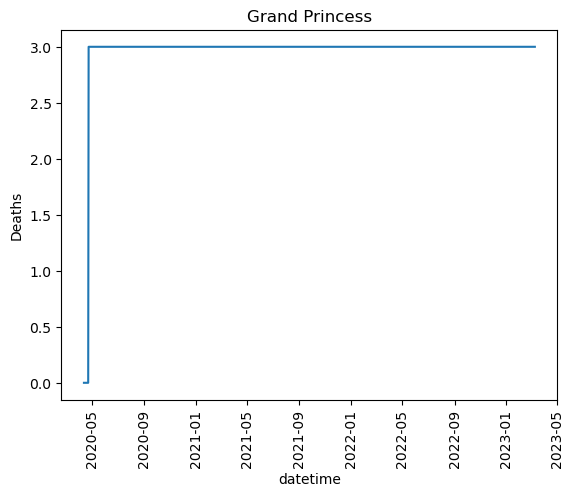

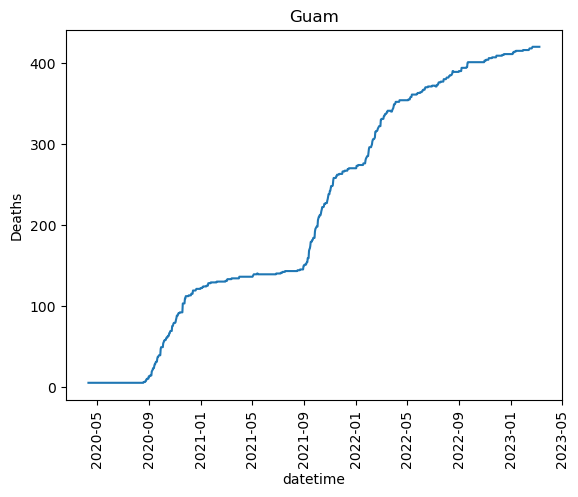

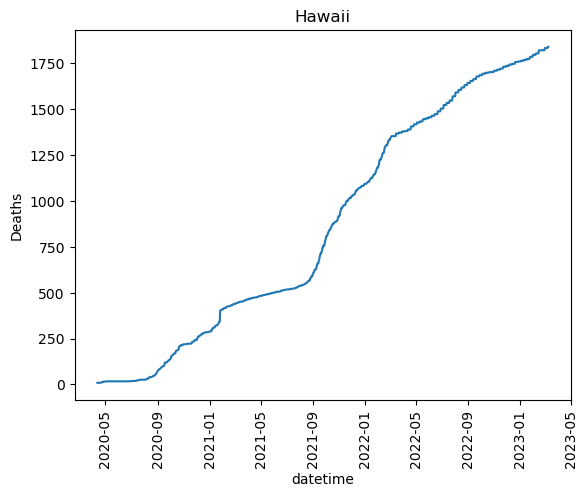

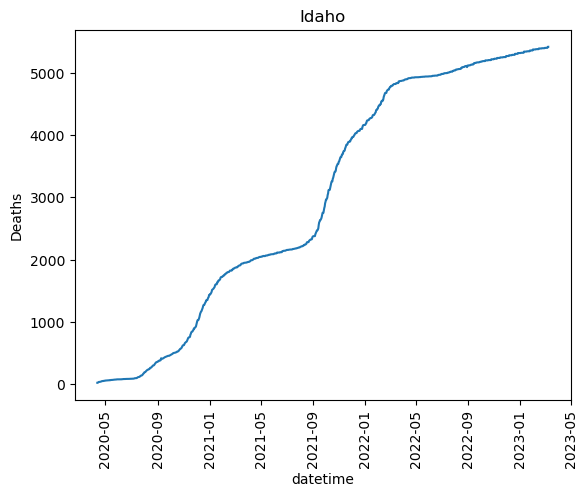

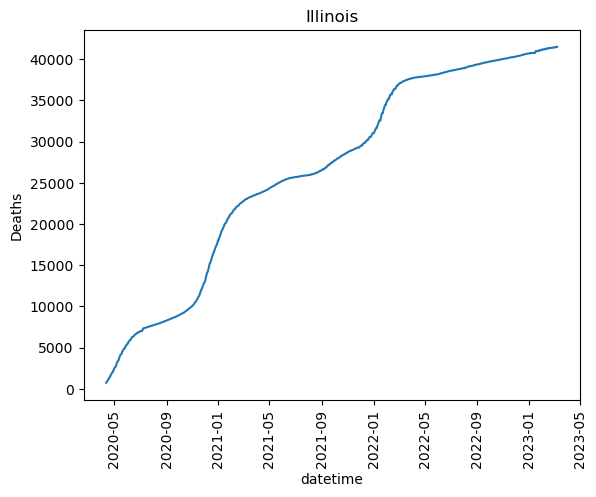

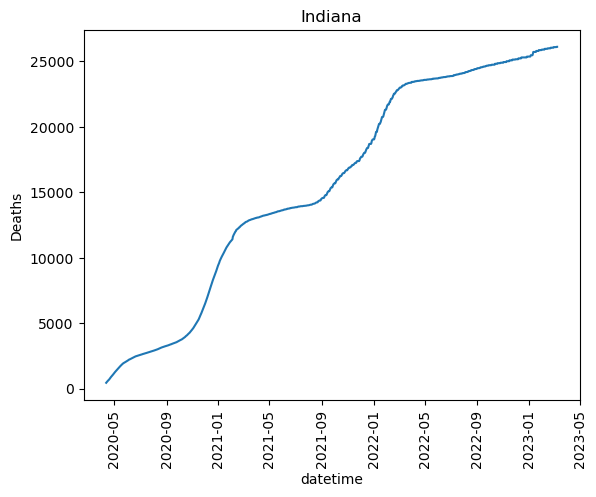

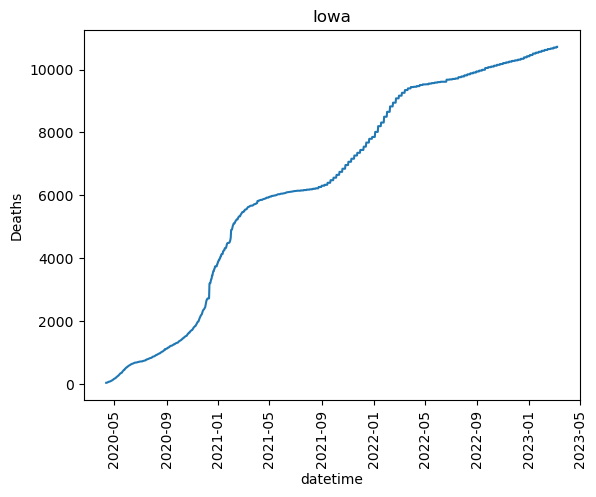

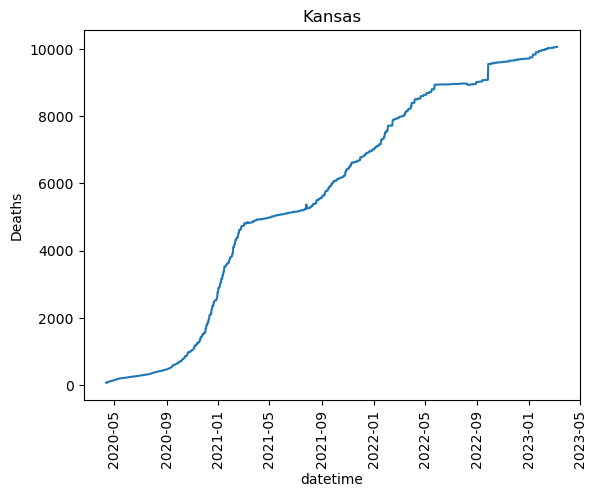

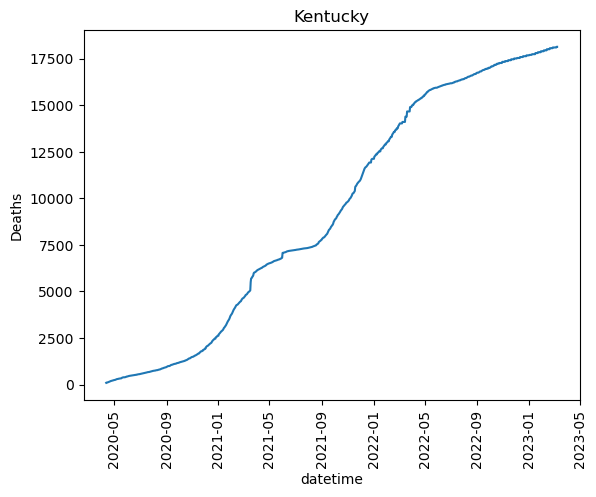

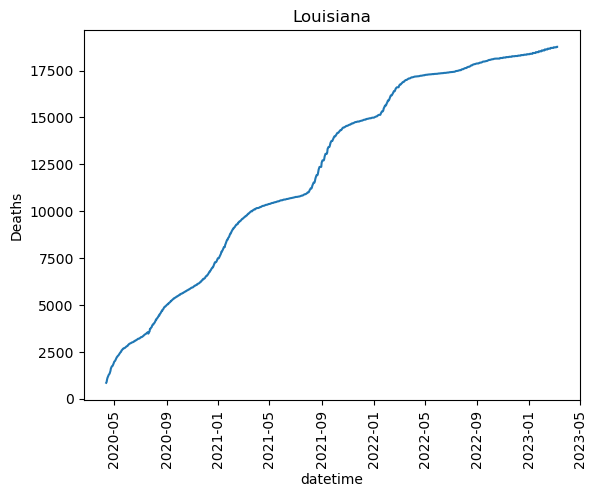

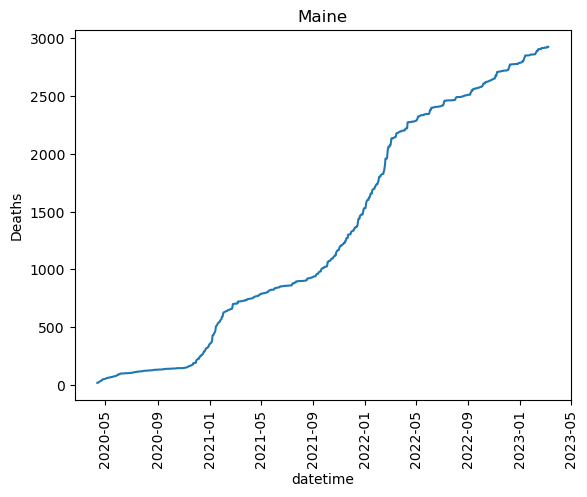

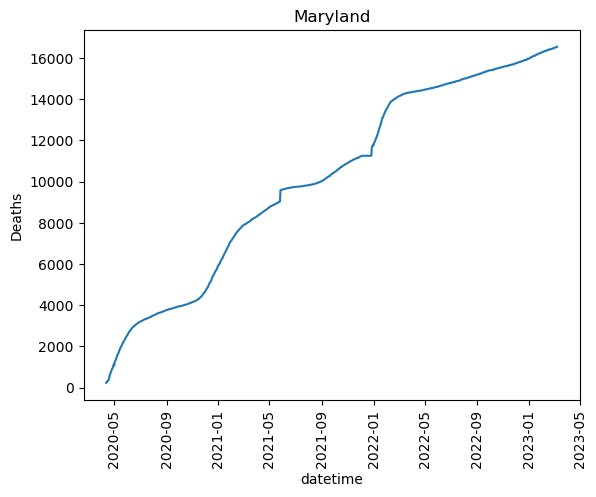

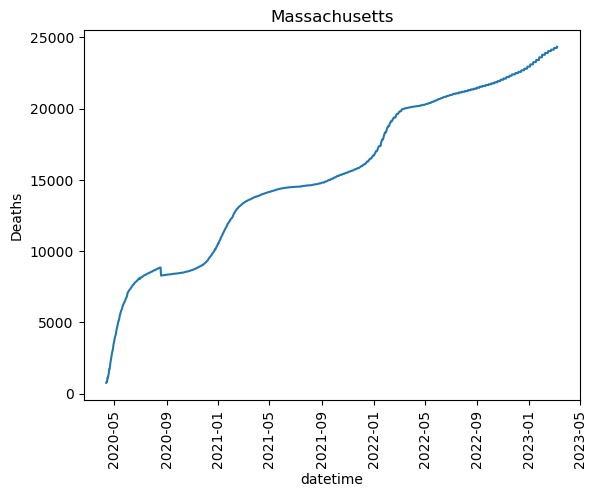

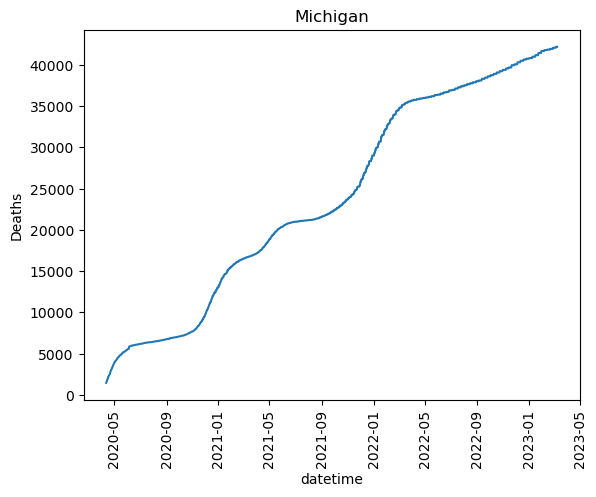

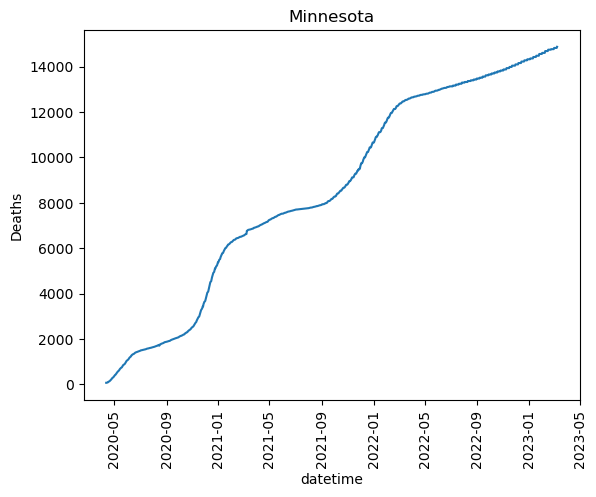

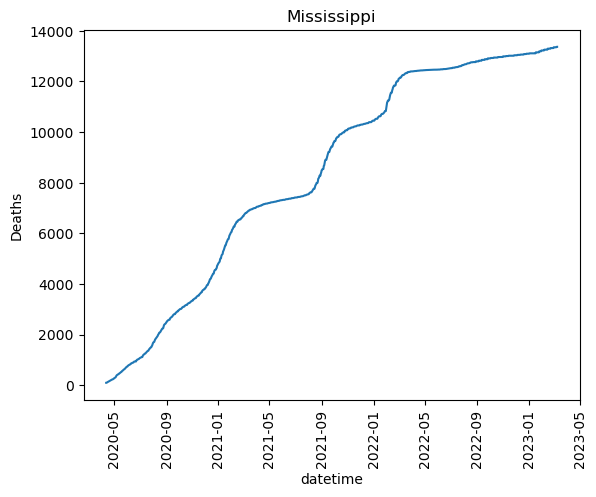

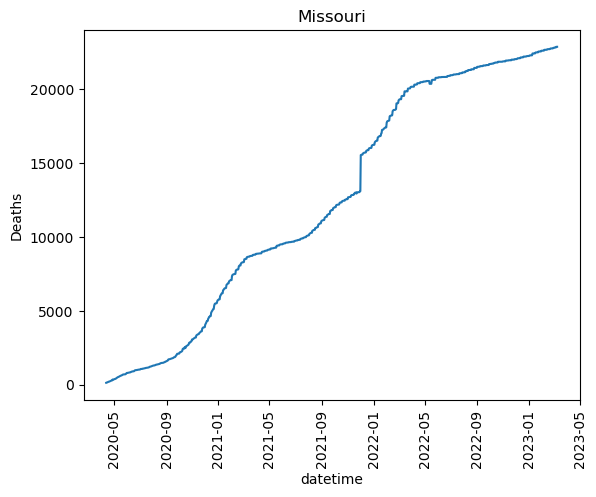

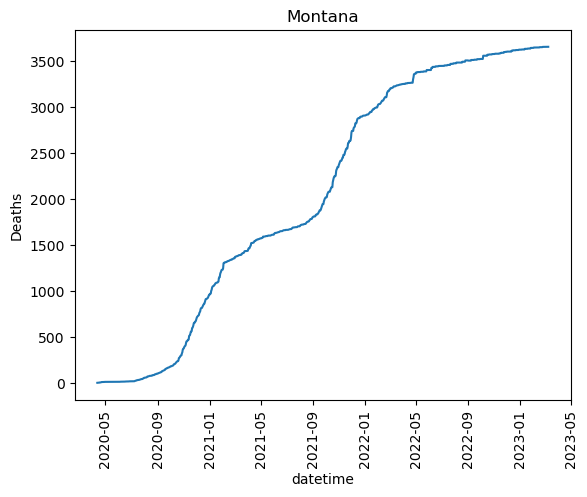

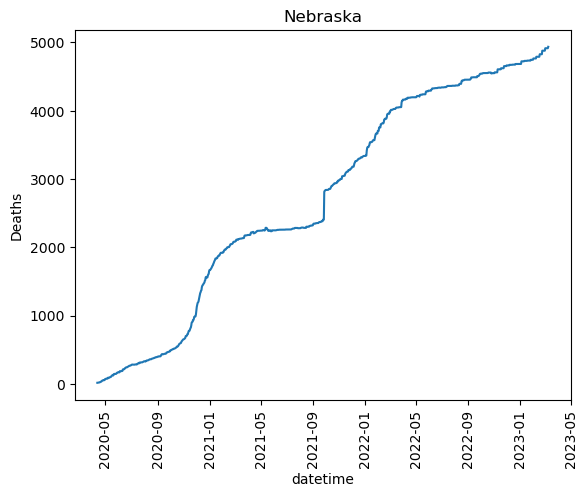

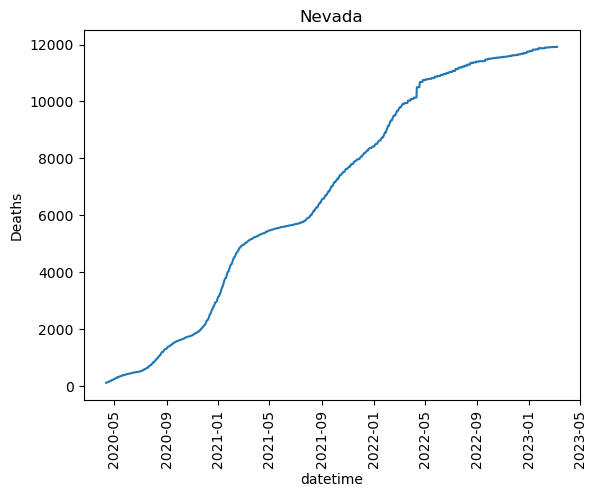

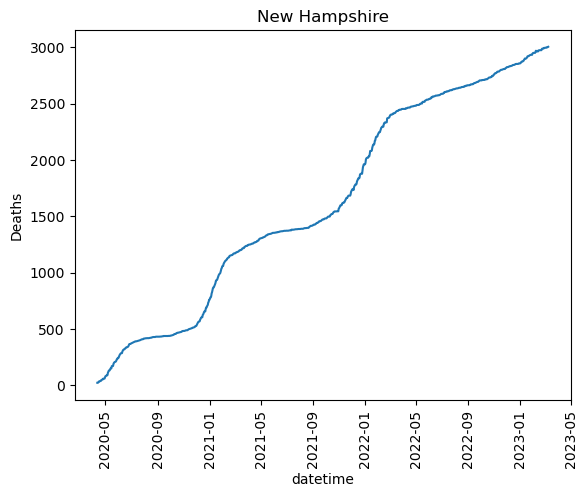

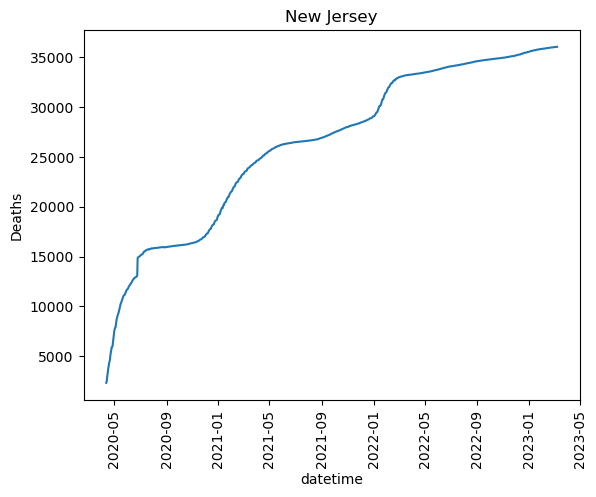

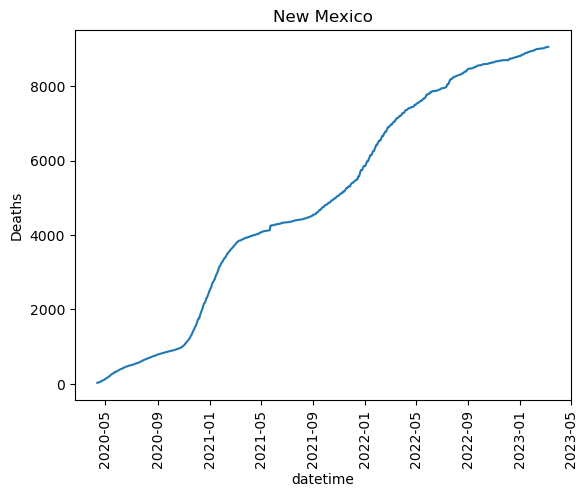

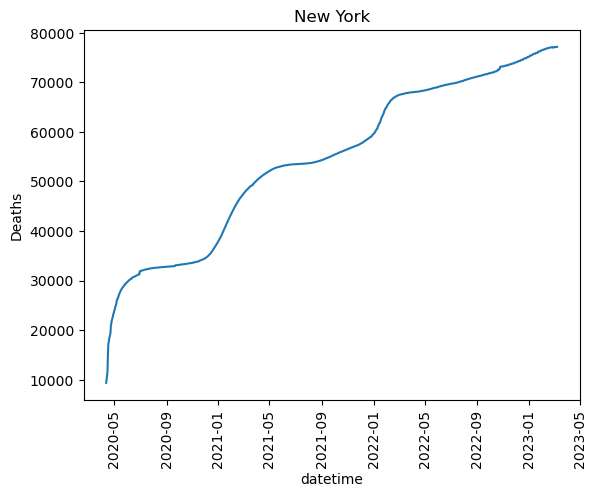

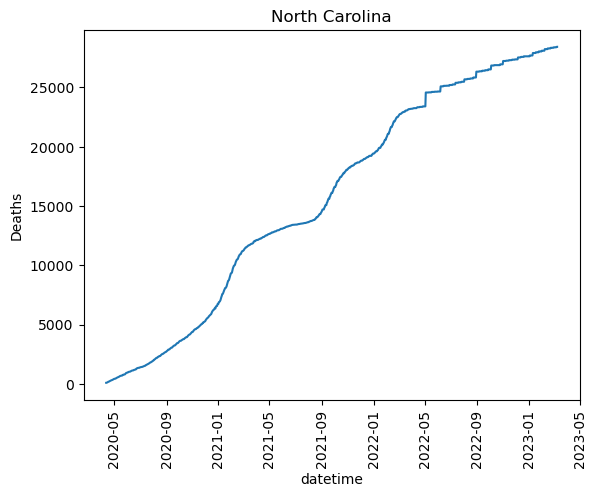

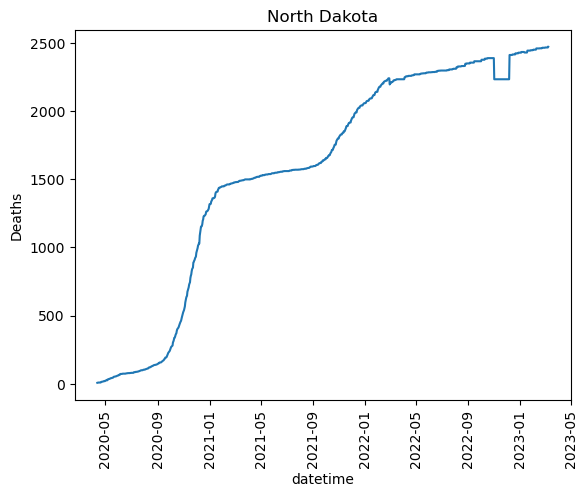

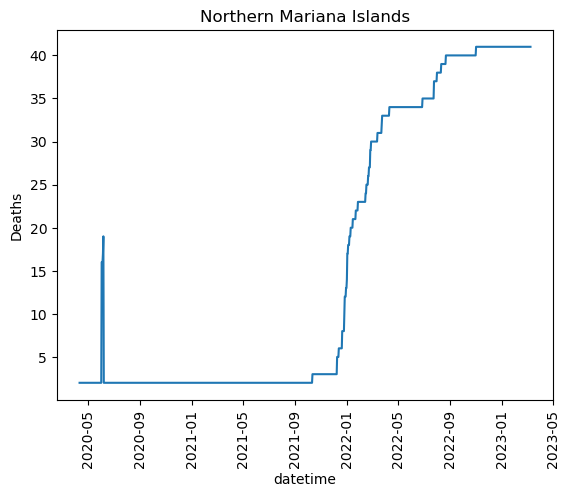

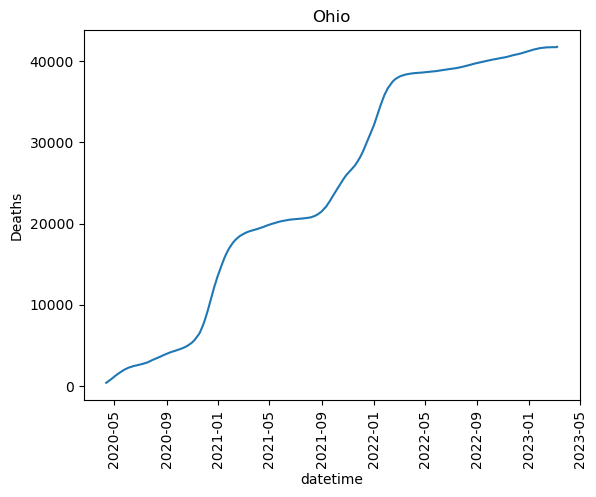

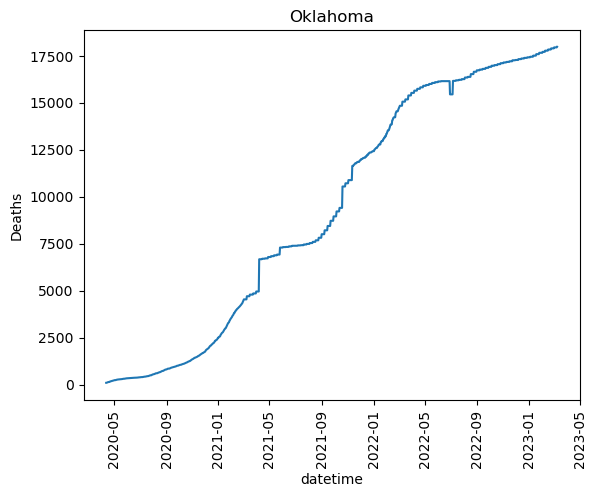

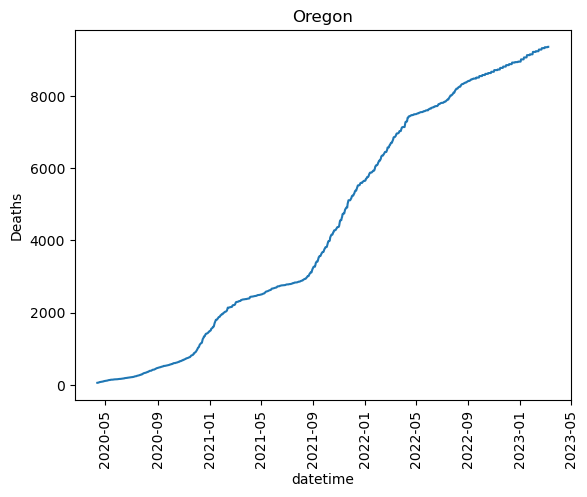

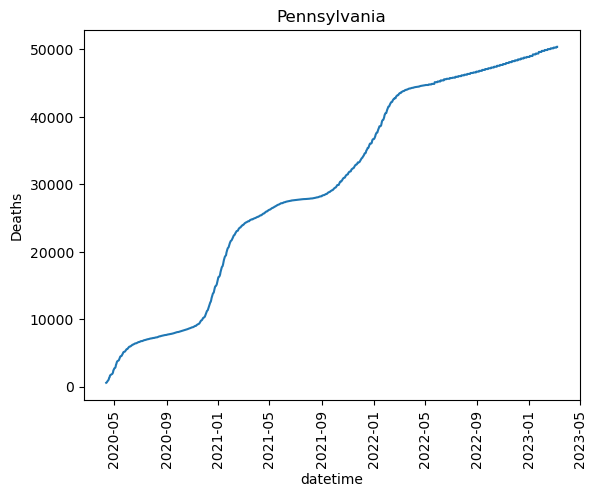

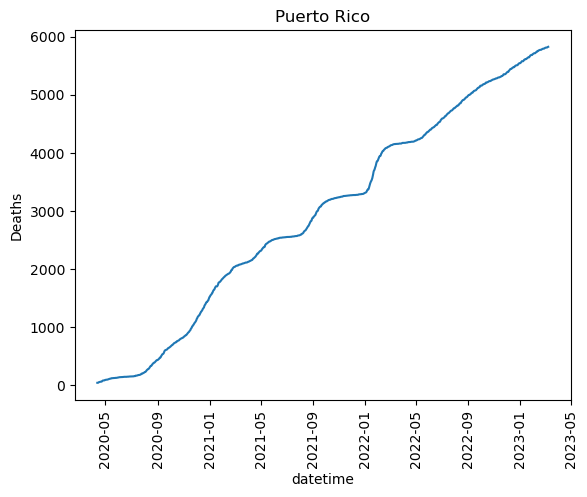

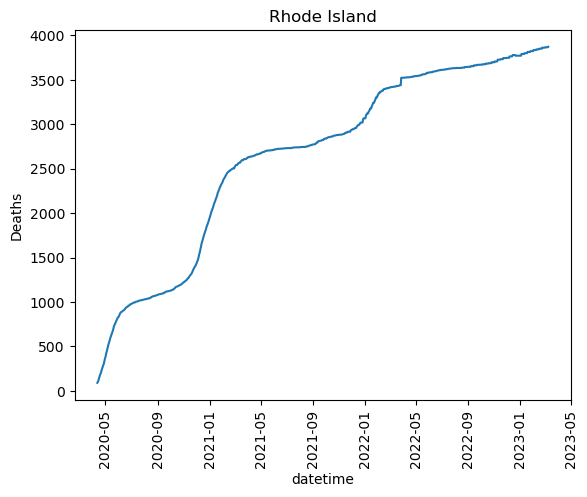

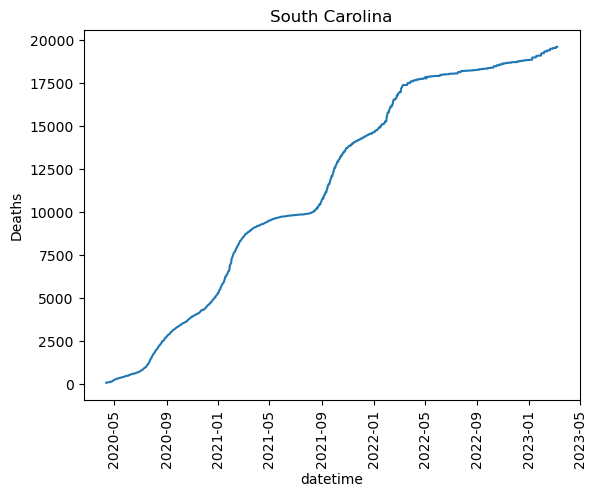

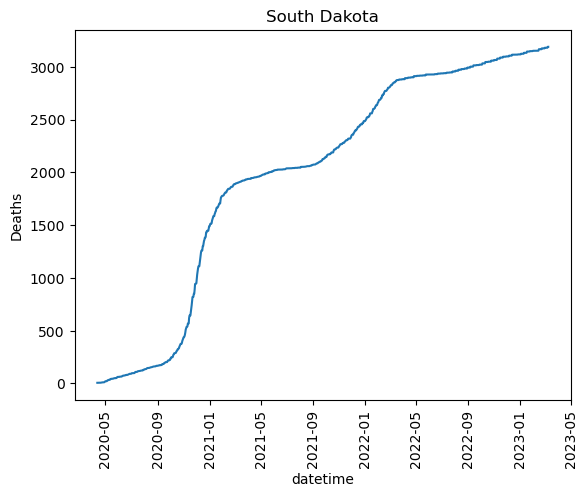

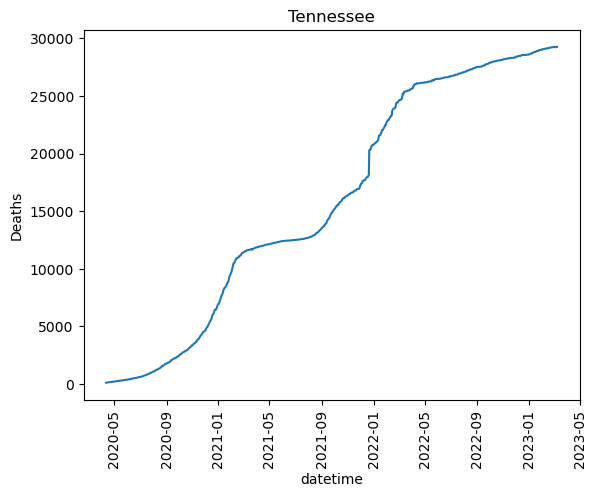

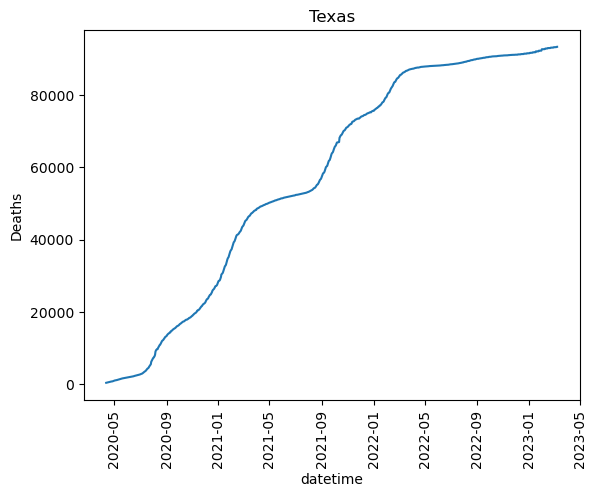

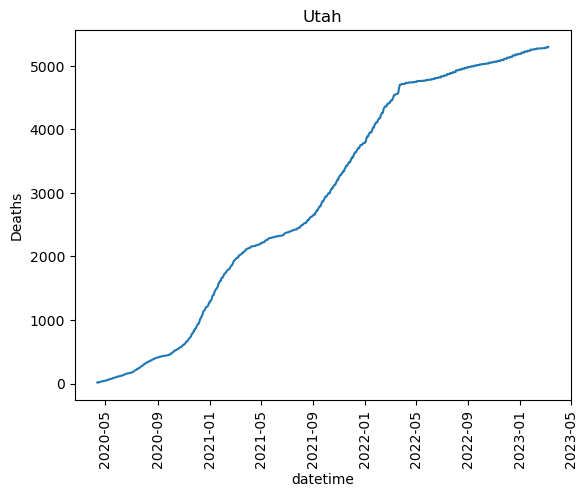

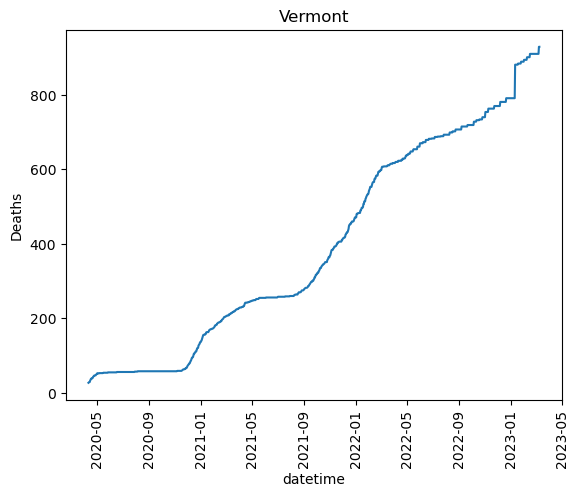

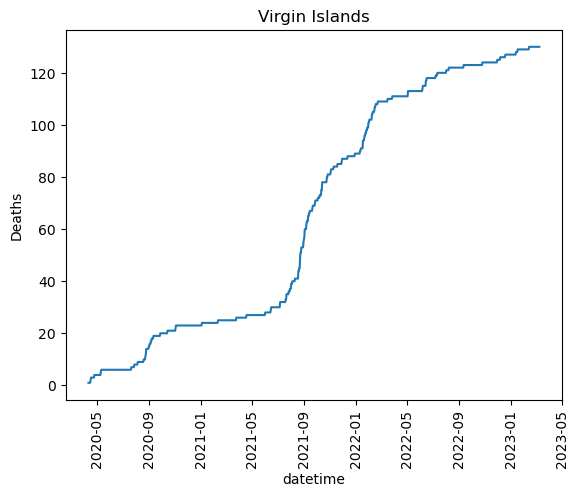

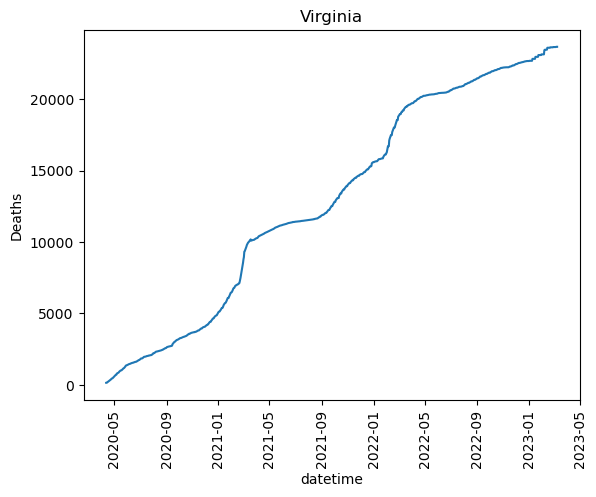

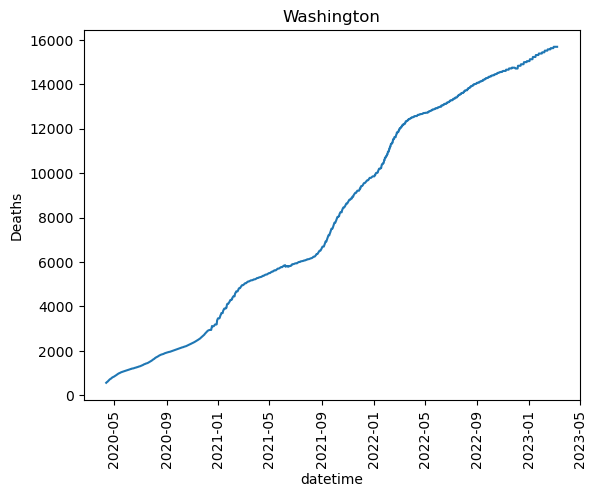

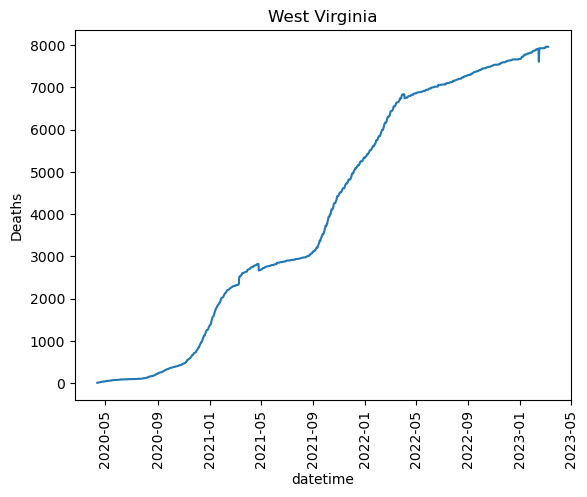

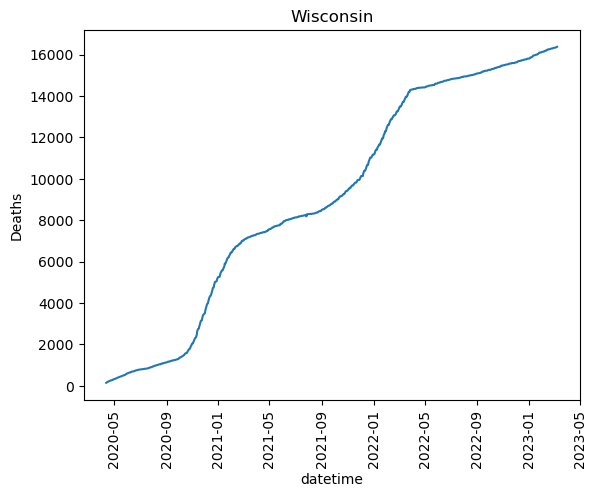

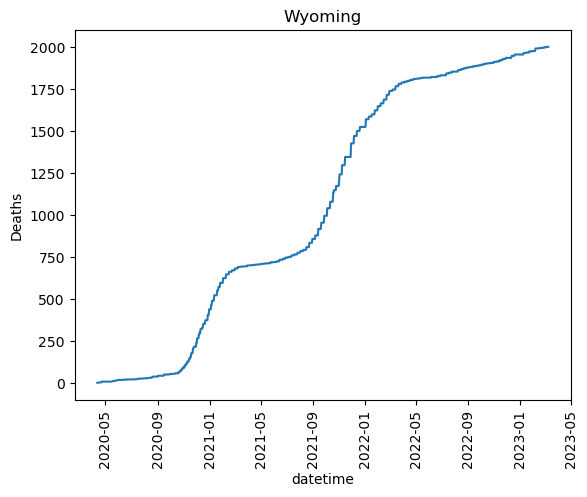

ValueError: Could not interpret value `datetime` for parameter `x`

In [51]:
for state in state_dict.keys():
    df = state_dict[state]
    sns.lineplot(df, x='datetime', y='Deaths')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.show()
#sns.lineplot(df, x='datetime', y='Active')

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


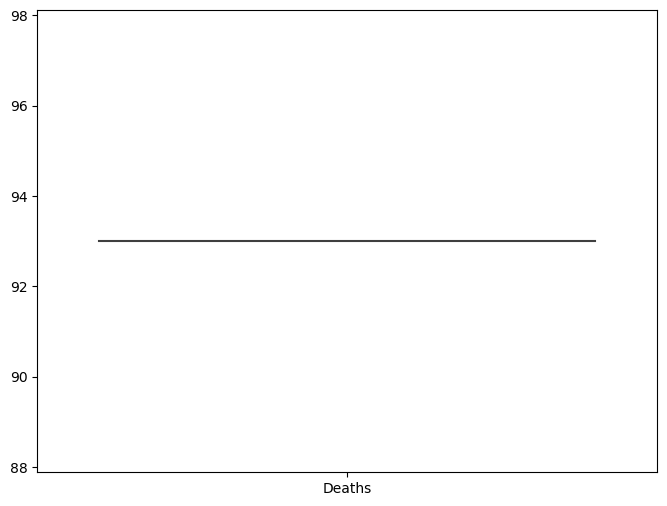

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


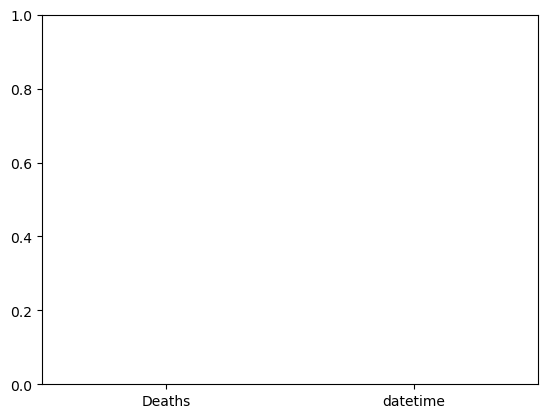

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


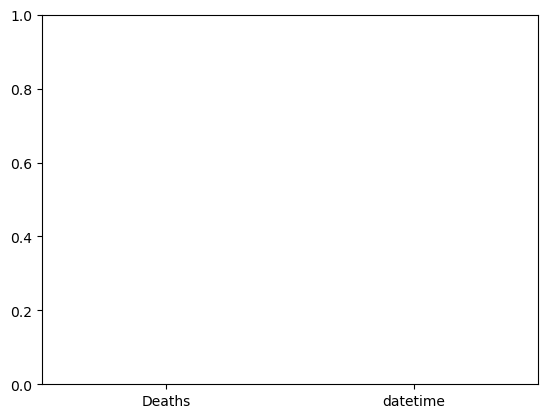

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


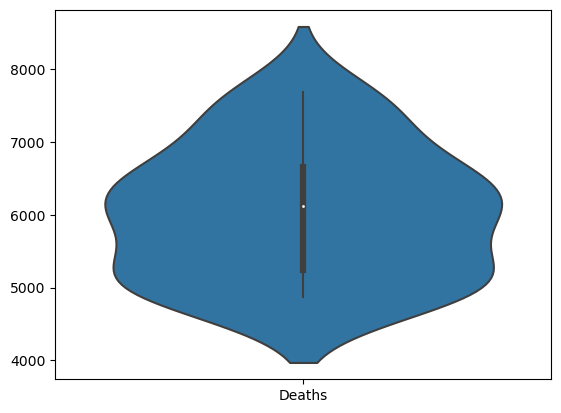

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


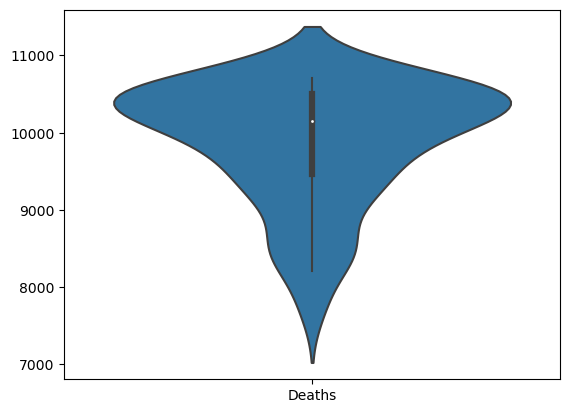

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


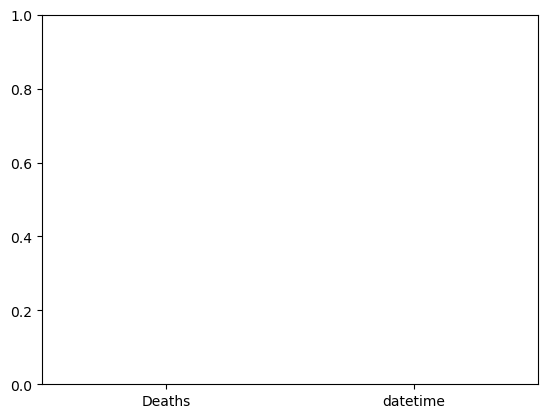

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


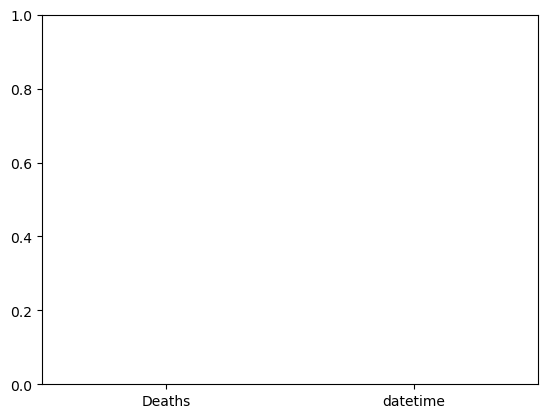

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


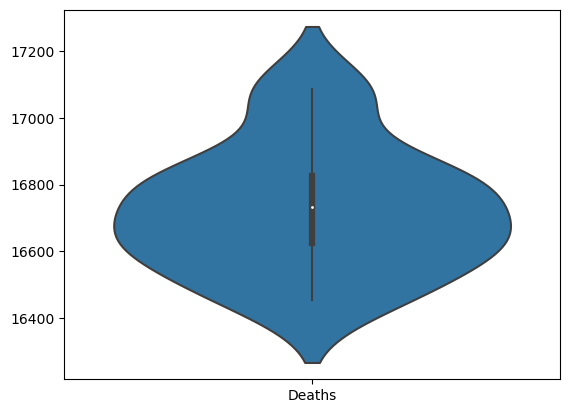

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


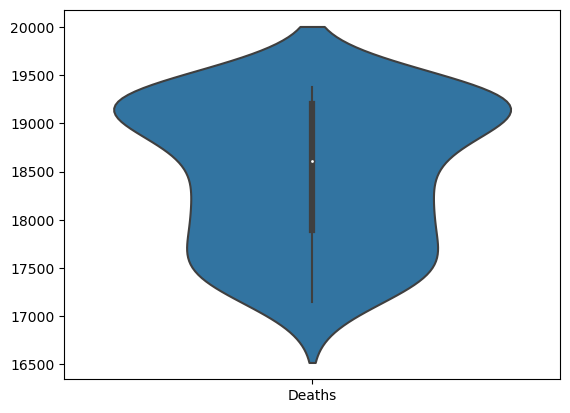

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


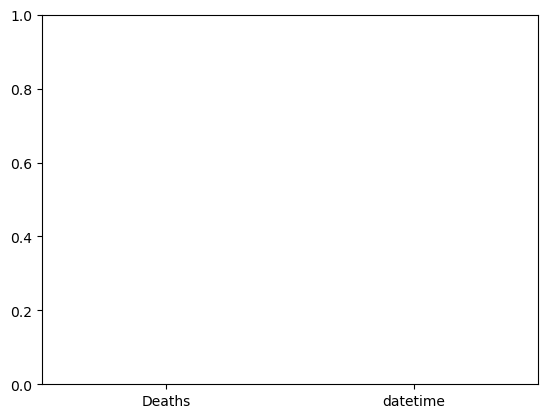

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


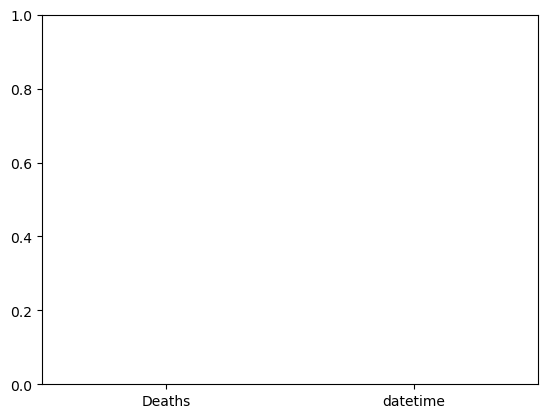

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


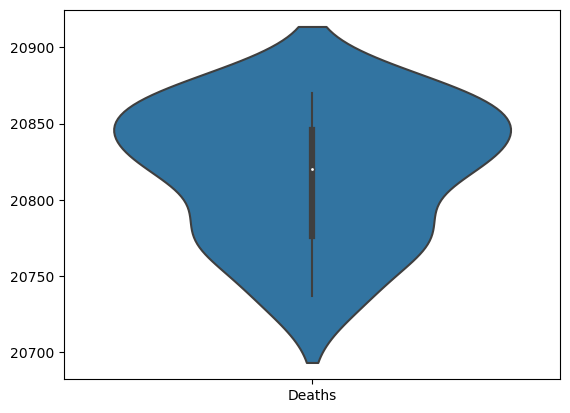

/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/data_200s/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


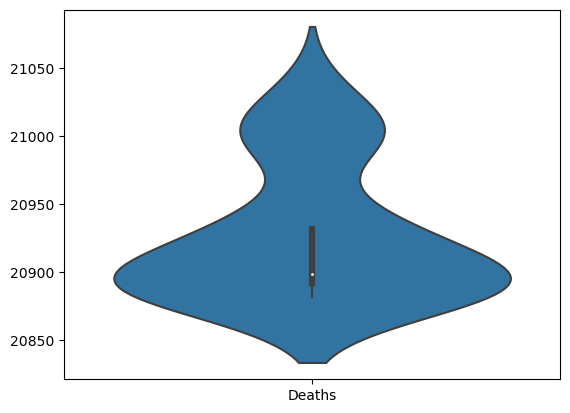

In [9]:
# df = state_dict['Alabama'].sort_values(by='datetime', ascending=True)
# df = state_dict['Alabama'][['Deaths', 'datetime']].groupby(pd.Grouper(key='datetime', freq='1M')).mean()

fig, ax = plt.subplots(figsize=(8,6))
grouped = state_dict['Alabama'][['Deaths', 'datetime']].groupby(pd.Grouper(key='datetime', freq='3M'))
# sns.violinplot(data=grouped, x='datetime', y='Deaths', split=True)

for name, group in grouped:
    sns.violinplot(data=group)
    plt.show()



In [166]:
state_dict['Recovered']

,0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-30 02:32:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,NaN,Recovered,US,2020-04-26 02:32:45,NaN,NaN,0.0,0.0,100372.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-25,NaN,2020-04-25 00:00:00
162,NaN,Recovered,US,2020-04-27 02:32:46,NaN,NaN,0.0,0.0,106988.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-26,NaN,2020-04-26 00:00:00
163,NaN,Recovered,US,2020-04-28 02:32:46,NaN,NaN,0.0,0.0,111424.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-27,NaN,2020-04-27 00:00:00
164,NaN,Recovered,US,2020-04-29 02:32:33,NaN,NaN,0.0,0.0,115936.0,0.0,...,NaN,NaN,NaN,84070001.0,USA,NaN,NaN,2020-04-28,NaN,2020-04-28 00:00:00


In [165]:
for state in state_dict.keys():
    print(state)

Alabama
Alaska
American Samoa
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming
Recovered


### stuff below

In [2]:
counts_sex_age_state = pd.read_csv('cdc_death_counts_by_sex_age_state.csv')
# counts_sex_age_state = counts_sex_age_state[counts_sex_age_state['State' == 'United States']]
counts_sex_age_state['State'].value_counts()
len(counts_sex_age_state)

85374

In [7]:
# List of features
counts_sex_age_state.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [6]:
new = counts_sex_age_state['Group'].value_counts()
new
# counts_sex_age_state

Group
By Month    74358
By Year      8262
By Total     2754
Name: count, dtype: int64

In [17]:
new1 = counts_sex_age_state['Year'].value_counts()
new1

Year
2020.0    35802
2021.0    35802
2022.0    11016
Name: count, dtype: int64

/home/sam/miniconda3/envs/chem_277b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/chem_277b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/chem_277b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam/miniconda3/envs/chem_277b/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

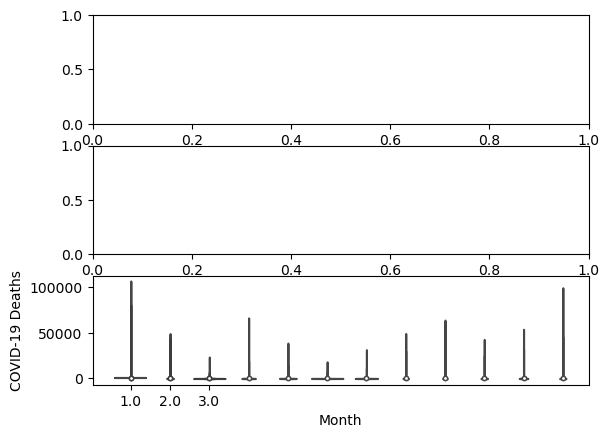

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1 = sns.violinplot(counts_sex_age_state[counts_sex_age_state['Year'] == 2020], x='Month', y='COVID-19 Deaths')
ax1.plot()
ax2 = sns.violinplot(counts_sex_age_state[counts_sex_age_state['Year'] == 2021], x='Month', y='COVID-19 Deaths')
ax2.plot()
ax3 = sns.violinplot(counts_sex_age_state[counts_sex_age_state['Year'] == 2022], x='Month', y='COVID-19 Deaths')
ax3.plot()
plt.show()